In [50]:
import numpy as np
import scipy.stats as sps
import os
import csv
import matplotlib.pyplot as plt

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

SEED = 350107321 # from random.org
np.random.seed(SEED)

print(plt.style.available)
plt.style.use('seaborn-white')

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [4]:
currentdir = os.getcwd()
datadir = os.path.join(currentdir,'OxytocinRSData_new')
print(datadir)

/Volumes/Data2/programming/PythonProjects/fMRI-analysis/OxytocinRSData_new


In [5]:
# get data files names
datafilenames = os.listdir(datadir)
print(datafilenames)

['Subject001.npy', 'Subject002.npy', 'Subject003.npy', 'Subject004.npy', 'Subject005.npy']


In [6]:
# function to calculate A and B from the dataset
def OUanalytic(data):
    N = data.size
    data1sq = data[0]**2
    dataNsq = data[-1]**2
    datasq = np.sum(data[1:-1]**2)
    datacorr = np.sum(data[0:-1]*data[1:])
    coef = [(N-1)*datasq,
       (2.0-N)*datacorr,
       -data1sq-(N+1)*datasq-dataNsq,
       N*datacorr]
    B=np.roots(coef)[-1]
    Q=(data1sq+dataNsq)/(1-B**2)
    Q=Q+datasq*(1+B**2)/(1-B**2)
    Q=Q-datacorr*2*B/(1-B**2)
    A = Q/N
    P2A = -N/A**2/2
    Btmp = B**2*(1+2*N)
    tmp = (1+Btmp)*(data1sq+dataNsq) + (2*Btmp + N + 1 -B**4*(N-1))*datasq - 2*B*(1+B**2+2*N)*datacorr
    P2B = -tmp/((1-B**2)**2*(data1sq+dataNsq + (1+B**2)*datasq - 2*B*datacorr))
    PAB = (N-1)*B/A/(1-B**2)
    dA = np.sqrt(-P2B/(P2A*P2B-PAB**2))
    dB = np.sqrt(-P2A/(P2A*P2B-PAB**2))
    return A,dA,B,dB

def OUresult(data,deltat):
    A, dA, B ,dB = OUanalytic(data)
    tau = -deltat/np.log(B)
    dtau = deltat*dB/B/np.log(B)**2
    return A,dA,tau,dtau

def OUcross(data1,data2):
    x1 = data1 + data2
    x2 = data1 - data2
    x1_A,x1_dA, x1_tau ,x1_dtau= OUresult(x1,0.802)
    x2_A, x2_dA, x2_tau ,x2_dtau= OUresult(x2,0.802)
    return (x1_A - x2_A)/x2_A, np.sqrt(x1_dA**2 + x1_A**2*x2_dA**2/x2_A**4)

mean MPFC:  -2.5499314e-09
var:  0.999999880790714
N:  748
relaxation time: 4.276602482254818 SD tau 0.5592808445022631
A  0.9952146587322573 SD A 0.11884219318742377
mean PCC:  1.2749657e-09
var:  1.0
relaxation time: 6.181133648572227 SD tau 0.9407212374820123
A  0.9937792702457918 SD A 0.14192204478042578
mean RLP:  -1.5299587e-08
var:  0.9999996423721633
relaxation time: 3.9463579348115476 SD tau 0.5018782627386921
A  1.0002102885856168 SD A 0.11521987937030302
mean LLP:  7.649794e-09
var:  1.0
relaxation time: 4.5815683180901114 SD tau 0.6224672731342222
A  1.0101038497486168 SD A 0.12581292842541592
mean MPFC:  -5.0998628e-09
var:  1.000000476837215
N:  748
relaxation time: 6.303452036864351 SD tau 0.9664160564041558
A  0.9921413761036094 SD A 0.1429234278901148
mean PCC:  7.649794e-09
var:  1.0
relaxation time: 7.217649153672873 SD tau 1.1838541637882665
A  1.0062769259605675 SD A 0.15611971630909358
mean RLP:  -5.7373453e-09
var:  1.0000002384185933
relaxation time: 7.295618221

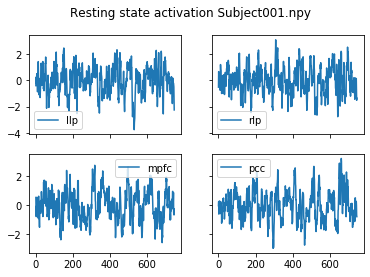

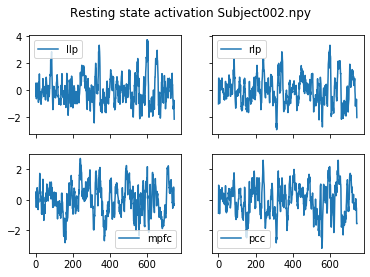

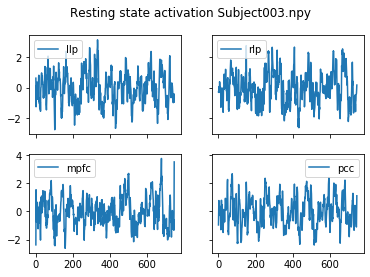

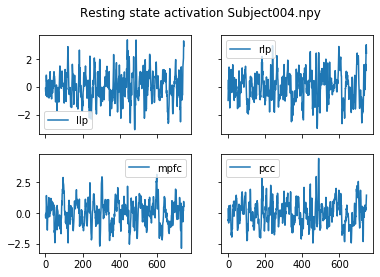

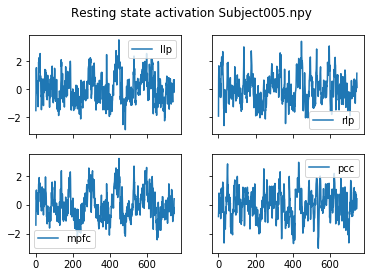

In [15]:
results = None
for datafilename in datafilenames:
    time_series = np.load(os.path.join(datadir,datafilename))
    mpfc = time_series[:,0]
    llp = time_series[:,1]
    rlp = time_series[:,2]
    pcc = time_series[:,3]
    
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
    f.suptitle('Resting state activation '+datafilename)
    ax1.plot(llp, label="llp")
    ax1.legend()
    ax2.plot(rlp,label = "rlp")
    ax2.legend()
    ax3.plot(mpfc,label = "mpfc")
    ax3.legend()
    ax4.plot(pcc,label = "pcc")
    ax4.legend()
    
    print("mean MPFC: ",mpfc.mean())
    print("var: ",mpfc.std()**2)
    N=len(mpfc)
    print("N: ",N)
    mpfc_A,mpfc_sA, mpfc_tau, mpfc_dtau = OUresult(mpfc,0.802)
    print("relaxation time:",mpfc_tau, "SD tau", mpfc_dtau)
    print("A ",mpfc_A,"SD A",mpfc_sA)
    mpfc_norm=mpfc/np.sqrt(mpfc_A)
    t = np.arange(N)*0.802 # tR = 0.802 sec

    print("mean PCC: ",pcc.mean())
    print("var: ",pcc.std()**2)
    pcc_A,pcc_sA, pcc_tau, pcc_dtau = OUresult(pcc,0.802)
    print("relaxation time:",pcc_tau, "SD tau", pcc_dtau)
    print("A ",pcc_A,"SD A",pcc_sA)
    pcc_norm=pcc/np.sqrt(pcc_A)
    
    print("mean RLP: ",rlp.mean())
    print("var: ",rlp.std()**2)
    rlp_A,rlp_sA, rlp_tau, rlp_dtau = OUresult(rlp,0.802)
    print("relaxation time:",rlp_tau, "SD tau", rlp_dtau)
    print("A ",rlp_A,"SD A",rlp_sA)
    rlp_norm=rlp/np.sqrt(rlp_A)
    
    print("mean LLP: ",llp.mean())
    print("var: ",llp.std()**2)
    llp_A,llp_sA, llp_tau, llp_dtau = OUresult(llp,0.802)
    print("relaxation time:",llp_tau, "SD tau", llp_dtau)
    print("A ",llp_A,"SD A",llp_sA)
    llp_norm=llp/np.sqrt(llp_A)
    
    mpfc_pcc,mpfc_pcc_sd = OUcross(mpfc_norm,pcc_norm)
    mpfc_rlp,mpfc_rlp_sd = OUcross(mpfc_norm,rlp_norm)
    mpfc_llp,mpfc_llp_sd = OUcross(mpfc_norm,llp_norm)
    pcc_rlp,pcc_rlp_sd = OUcross(pcc_norm,rlp_norm)
    pcc_llp,pcc_llp_sd = OUcross(pcc_norm,llp_norm)
    rlp_llp,rlp_llp_sd = OUcross(rlp_norm,llp_norm)
    
    mpfc_pcc_pc,mpfc_pcc_pv = sps.pearsonr(mpfc_norm,pcc_norm)
    mpfc_rlp_pc,mpfc_rlp_pv = sps.pearsonr(mpfc_norm,rlp_norm)
    mpfc_llp_pc,mpfc_llp_pv = sps.pearsonr(mpfc_norm,llp_norm)
    pcc_rlp_pc,pcc_rlp_pv = sps.pearsonr(pcc_norm,rlp_norm)
    pcc_llp_pc,pcc_llp_pv = sps.pearsonr(pcc_norm,llp_norm)
    rlp_llp_pc,rlp_llp_pv = sps.pearsonr(rlp_norm,llp_norm)
    
    result = np.array([mpfc_pcc,
                       mpfc_pcc_sd,
                        mpfc_rlp,
                       mpfc_rlp_sd,
                        mpfc_llp,
                       mpfc_llp_sd,
                        pcc_rlp,
                       pcc_rlp_sd,
                        pcc_llp,
                       pcc_llp_sd,
                        rlp_llp,
                       rlp_llp_sd,
                        mpfc_pcc_pc,
                       mpfc_pcc_pv,
                        mpfc_rlp_pc,
                       mpfc_rlp_pv,
                        mpfc_llp_pc,
                       mpfc_llp_pv,
                        pcc_rlp_pc,
                       pcc_rlp_pv,
                        pcc_llp_pc,
                       pcc_llp_pv,
                        rlp_llp_pc,
                       rlp_llp_pv])
    
    if results is None:
        results = result
    else:
        results = np.vstack((results,result))
        

In [33]:
x = ['1','2','3','4','5','mean']
np.append(results.T[0],[results.T[0].mean()])

array([1.2435271 , 3.03169143, 2.65864527, 0.94052167, 1.8311872 ,
       1.94111453])

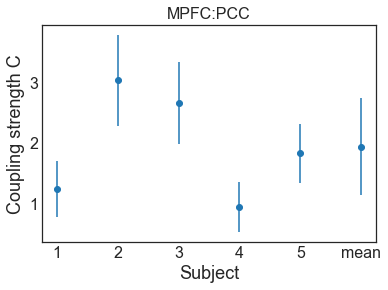

In [56]:
plt.errorbar(x,np.append(results.T[0],[results.T[0].mean()]),
                         yerr=np.append(results.T[1],[results.T[0].std()]),fmt="o")
plt.title("MPFC:PCC")
plt.ylabel("Coupling strength C")
plt.xlabel("Subject")
plt.savefig("mpfc_pcc.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

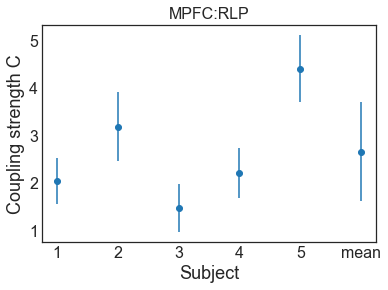

In [57]:
plt.errorbar(x,np.append(results.T[2],[results.T[2].mean()]),
                         yerr=np.append(results.T[3],[results.T[2].std()]),fmt="o")
plt.title("MPFC:RLP")
plt.ylabel("Coupling strength C")
plt.xlabel("Subject")
plt.savefig("mpfc_rlp.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

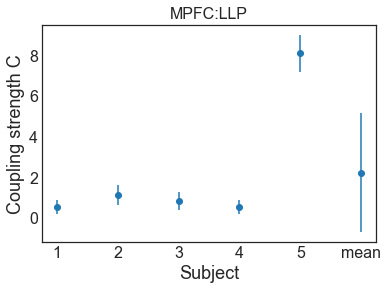

In [58]:
plt.errorbar(x,np.append(results.T[4],[results.T[4].mean()]),
                         yerr=np.append(results.T[5],[results.T[4].std()]),fmt="o")
plt.title("MPFC:LLP")
plt.ylabel("Coupling strength C")
plt.xlabel("Subject")
plt.savefig("mpfc_llp.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

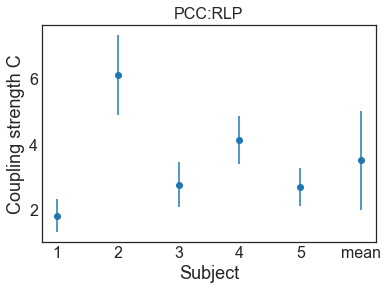

In [59]:
plt.errorbar(x,np.append(results.T[6],[results.T[6].mean()]),
                         yerr=np.append(results.T[7],[results.T[6].std()]),fmt="o")
plt.title("PCC:RLP")
plt.ylabel("Coupling strength C")
plt.xlabel("Subject")
plt.savefig("pcc_rlp.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

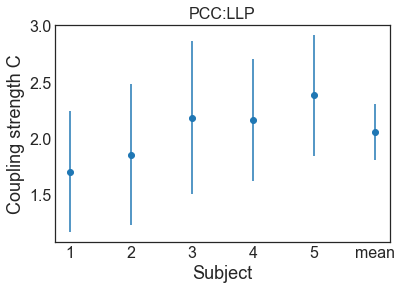

In [60]:
plt.errorbar(x,np.append(results.T[8],[results.T[8].mean()]),
                         yerr=np.append(results.T[9],[results.T[8].std()]),fmt="o")
plt.title("PCC:LLP")
plt.ylabel("Coupling strength C")
plt.xlabel("Subject")
plt.savefig("pcc_llp.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

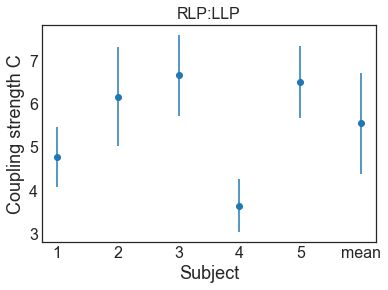

In [61]:
plt.errorbar(x,np.append(results.T[10],[results.T[10].mean()]),
                         yerr=np.append(results.T[11],[results.T[10].std()]),fmt="o")
plt.title("RLP:LLP")
plt.ylabel("Coupling strength C")
plt.xlabel("Subject")
plt.savefig("rlp_llp.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [44]:
np.savetxt(os.path.join(datadir,"results.csv"),results,delimiter = ",")

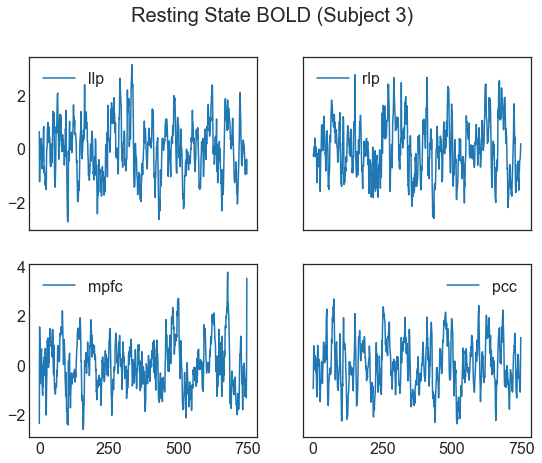

In [53]:
time_series = np.load(os.path.join(datadir,datafilenames[2]))
mpfc = time_series[:,0]
llp = time_series[:,1]
rlp = time_series[:,2]
pcc = time_series[:,3]
    
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(9,7))
f.suptitle('Resting State BOLD (Subject 3)')
ax1.plot(llp, label="llp")
ax1.legend()
ax2.plot(rlp,label = "rlp")
ax2.legend()
ax3.plot(mpfc,label = "mpfc")
ax3.legend()
ax4.plot(pcc,label = "pcc")
ax4.legend()
plt.savefig("subject3.png",format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")